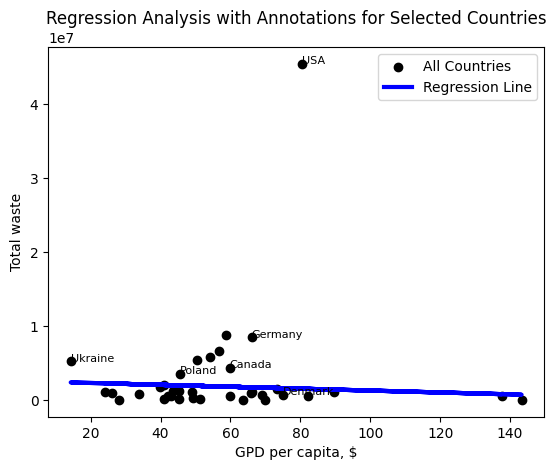

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Замініть 'your_data.csv' на шлях до вашого файлу з даними
file_path = './updated_dataset.csv'
data = pd.read_csv(file_path)

# Сумарна втрата як цільова змінна
data['Total waste'] = data[['Household estimate (tonnes/year)', 'Food service estimate (tonnes/year)', 'Retail estimate (tonnes/year)']].sum(axis=1)

# Обрати лише обрані країни
selected_countries = ['Denmark', 'USA', 'Canada', 'Germany', 'Ukraine', 'Poland']
selected_data = data[data['Country'].isin(selected_countries)]

# Визначте залежну та незалежні змінні
X = data[['GPD per capita, $']]
y = data['Total waste']

# Розбивка даних на тренувальний та тестовий набори (не використовується для прогнозування, а лише для візуалізації)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення та навчання моделі регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування на всіх даних
predictions = model.predict(X)

# Візуалізація результатів з анотаціями лише для обраних країн
plt.scatter(X, y, color='black', label='All Countries')

for i, txt in enumerate(selected_data['Country']):
    idx = selected_data.index[i]
    plt.annotate(txt, (X.loc[idx]['GPD per capita, $'], y.loc[idx]), fontsize=8)

plt.plot(X, predictions, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('GPD per capita, $')
plt.ylabel('Total waste')
plt.title('Regression Analysis with Annotations for Selected Countries')
plt.legend()
plt.show()



Countries below the regression line have total food waste less than predicted by their GDP per capita. This may indicate effective waste management or successful initiatives in these countries. Analyzing these model countries can serve as a benchmark for other regions, aiding in refining waste management strategies. It is crucial to consider additional influencing factors, such as infrastructure and cultural aspects, for a comprehensive understanding of the context and optimization of programs.


Regarding America, positioned in the top right corner far from the regression line, its substantial distance from the regression line indicates that it has higher total food waste than what would be predicted based on its GDP per capita. This outlier status suggests that the United States may experience higher food waste levels compared to what is typically associated with its level of economic development. Further investigation into the specific factors contributing to this deviation could provide insights into waste management challenges or unique consumption patterns in the United States.